#                               <center>   VERİ MADENCİLİĞİ DERSİ</center>

## <center> HAZİRAN 2021 </center>

##                                           <center>           PROJE ÖDEVİ</center>

##                                              <center>        NİYAZİ İÇDAĞ</center>

###                                                          <center>            14011706</center>

***Veri Seti:*** Speaker Accent Recognition<br>
***Veri Seti Özellikleri: Toplam kayıt sayısı:*** 329 adet ***Toplam Özellik sayısı:*** 12 + 1 (Language)<br>
Aksan algılama ve tanıma için altı farklı ülkeden konuşmacılar tarafından okunan tek İngilizce kelimeleri içeren veri setidir.
Veri setinde ses dosyalarına MFCC uygulanarak gerekli özellik çıkarımları yapıldığı tespit edilmiştir.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# A.VERİ ANALİZİ 
## Veri Seti Bilgileri

Aşağıda veri setimiz .csv dosyasından okunmuştur.Listeden de görüldüğü üzere veri setimizde aksanları tutan language özelliği ve her bir aksan için çıkarılmış MFCC değerlerini tutan 12 adet özellik bulunmaktadır.


In [2]:
#verisetini okuyoruz
df=pd.read_csv("accent-mfcc-data-1.csv")
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


## Sınıf Bilgileri

Aşağıda görüleceği üzere veri setimizde toplam 6 sınıf bulunmaktadır.Bu sınıflar her bir dili temsil etmektedir ve kısaltmaları kullanılmıştır.Her bir sınıfa düşen örnek sayıları aşağıda listelenmiştir.

In [3]:
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

## Eksik Veri Kontrolü

Veri setimiz aşağıda kontrol edilmiş olup eksik veri bulunmamaktadır.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


## Aykırı Değer Analizi


In [5]:
import seaborn as sns

In [6]:
df2=df.copy()
df2=df2.select_dtypes(include = ['float64', 'int64'])
df2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


***Aşağıda tek tek tüm özellikler için boxplot çizdirilerek incelenmiş olup X1 özelliği dışında ki tüm özelliklerde aykırı değerlere rastlanmıştır.***

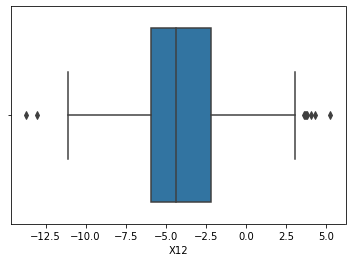

In [7]:
df2_table=df2["X12"].copy()
sns.boxplot(x=df2_table)

## Aykırı Değer Analizi
Aykırı değer analizi aşağıda yapılmış olup her bir özellik için bulunan aykırı değerler şunlardır.<br>
X1:0<br>
X2:2<br>
X3:13<br>
X4:5<br>
X5:44<br>
X6:36<br>
X7:5<br>
X8:10<br>
X9:46<br>
X10:50<br>
X11:18<br>
X12:9<br>
<br>
Buna göre en fazla aykırı değer bulunan 3 özellik X10, X9 ve X5'dir.

In [8]:
for feature in df._get_numeric_data():   
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)   
    IQR=(Q3)-(Q1)
    alt_sinir = Q1 - 1.5 * IQR  
    ust_sinir = Q3 + 1.5 * IQR  
    
    outliers_vector=df[df[feature].between(alt_sinir, ust_sinir, inclusive=True)][feature]    
    print("\nAlt aykırı değeri : ", alt_sinir)
    print("Üst aykırı değeri : ", ust_sinir, "\n")

    print(df[feature].name +" aykiri deger sayisi : ",df[feature].shape[0] - outliers_vector.shape[0], "\n")

    i=0
    deger=df.values
    for j in range(1,deger.shape[1]):
        print("Ilk Deger :" ,deger[i][j])
        if (float(deger[i][j]))<(alt_sinir):
            deger[i][j]=alt_sinir  
        elif (float(deger[i][j]))>(ust_sinir):
            deger[i][j]=ust_sinir
        print("Yeni deger :" ,deger[i][j])


Alt aykırı değeri :  -9.526464037507527
Üst aykırı değeri :  21.385715362558308 

X1 aykiri deger sayisi :  0 

Ilk Deger : 7.071475632798459
Yeni deger : 7.071475632798459
Ilk Deger : -6.51289966399678
Yeni deger : -6.51289966399678
Ilk Deger : 7.65079980498752
Yeni deger : 7.65079980498752
Ilk Deger : 11.150783200729101
Yeni deger : 11.150783200729101
Ilk Deger : -7.657312340580679
Yeni deger : -7.657312340580679
Ilk Deger : 12.4840205599929
Yeni deger : 12.4840205599929
Ilk Deger : -11.7097718857424
Yeni deger : -9.526464037507527
Ilk Deger : 3.42659638843557
Yeni deger : 3.42659638843557
Ilk Deger : 1.4627152025217198
Yeni deger : 1.4627152025217198
Ilk Deger : -2.81275273412956
Yeni deger : -2.81275273412956
Ilk Deger : 0.866537751632946
Yeni deger : 0.866537751632946
Ilk Deger : -5.24427382038509
Yeni deger : -5.24427382038509

Alt aykırı değeri :  -13.949034827944805
Üst aykırı değeri :  5.8730208847342755 

X2 aykiri deger sayisi :  2 

Ilk Deger : 7.071475632798459
Yeni deger

# B.SINIFLAMA
Bu bölümde incelenecek olan sınıflandırma yöntemleri şunlardır.<br>
1.Linear Discriminant Analysis (LDA)<BR>
2.Support Vector Machine (SVM)<br>
3.K-Nearest Neighbors (KNN)<br>
4.Decision Tree<br>
5.Multi-layer Perceptron Classifier (MLP)<br>
6.Random Forest Classifier (RFC)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
X = df[['X1', 'X2','X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11', 'X12']] .values
y = df['language'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [12]:
print(X_train)  
print(y_train)

[[ 3.70942563 -4.14600254  1.03171946 ... -5.25707029  0.76478587
  -7.74992225]
 [ 2.35654051 -1.83645913  1.54236647 ... -1.46781741  4.23172208
  -3.58237412]
 [ 2.06560324 -2.82550364 -0.84173605 ... -9.26621942  4.25734044
  -0.7860789 ]
 ...
 [ 0.26592603 -2.62620528  0.60748292 ... -1.30183983  2.05594212
  -3.28246787]
 [ 3.36289961 -5.27976425  7.35745133 ... -4.92981523  3.84920482
  -4.38408206]
 [12.44029597 -4.70540956  3.62772196 ... -9.7365039   3.25266795
  -5.96658115]]
['UK' 'GE' 'UK' 'ES' 'US' 'ES' 'US' 'US' 'FR' 'IT' 'US' 'GE' 'US' 'US'
 'GE' 'FR' 'US' 'US' 'US' 'US' 'FR' 'GE' 'US' 'US' 'US' 'FR' 'US' 'US'
 'US' 'US' 'IT' 'UK' 'GE' 'US' 'US' 'FR' 'FR' 'US' 'US' 'US' 'US' 'UK'
 'US' 'US' 'US' 'US' 'US' 'GE' 'GE' 'US' 'US' 'US' 'FR' 'US' 'US' 'UK'
 'US' 'US' 'US' 'FR' 'US' 'FR' 'US' 'US' 'UK' 'GE' 'US' 'US' 'US' 'US'
 'US' 'UK' 'US' 'FR' 'US' 'UK' 'US' 'IT' 'FR' 'IT' 'US' 'UK' 'US' 'US'
 'UK' 'UK' 'US' 'UK' 'US' 'US' 'US' 'GE' 'IT' 'US' 'US' 'ES' 'US' 'ES'
 'FR' 'UK' 

## Linear Discriminant Analysis (LDA)

In [86]:
LDA_model = LinearDiscriminantAnalysis()


In [87]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [88]:
LDA_prediction = LDA_model.predict(X_test)


### LDA SONUÇLARI

In [89]:
accuracy1=accuracy_score(LDA_prediction, y_test)
print("Accuracy :", accuracy1)
print("Confusion Matrix :\n", confusion_matrix(LDA_prediction, y_test),"\n")
print("Classification Report \n", classification_report(LDA_prediction, y_test))

Accuracy : 0.803030303030303
Confusion Matrix :
 [[ 8  0  0  0  0  0]
 [ 0  1  1  0  0  1]
 [ 0  0  7  0  0  2]
 [ 0  0  0  4  2  0]
 [ 2  0  0  0  5  0]
 [ 0  1  0  2  2 28]] 

Classification Report 
               precision    recall  f1-score   support

          ES       0.80      1.00      0.89         8
          FR       0.50      0.33      0.40         3
          GE       0.88      0.78      0.82         9
          IT       0.67      0.67      0.67         6
          UK       0.56      0.71      0.63         7
          US       0.90      0.85      0.88        33

    accuracy                           0.80        66
   macro avg       0.72      0.72      0.71        66
weighted avg       0.81      0.80      0.80        66



## Support Vector Machine (SVM_SVC)

In [90]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to


In [91]:
SVC_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
SVC_prediction = SVC_model.predict(X_test)


### SVC SONUÇLARI

In [93]:
accuracy2=accuracy_score(SVC_prediction, y_test)
print("Accuracy :", accuracy2)
print("Confusion Matrix :\n", confusion_matrix(SVC_prediction, y_test),"\n")
print("Classification Report \n", classification_report(SVC_prediction, y_test))

Accuracy : 0.5909090909090909
Confusion Matrix :
 [[ 1  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  1  2  0  0]
 [ 0  0  0  0  3  0]
 [ 9  2  5  4  6 31]] 

Classification Report 
               precision    recall  f1-score   support

          ES       0.10      1.00      0.18         1
          FR       0.00      0.00      0.00         0
          GE       0.25      1.00      0.40         2
          IT       0.33      0.67      0.44         3
          UK       0.33      1.00      0.50         3
          US       1.00      0.54      0.70        57

    accuracy                           0.59        66
   macro avg       0.34      0.70      0.37        66
weighted avg       0.90      0.59      0.67        66



C:\Users\Neo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K- Nearest Neighbors (K-NN)

In [94]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [95]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
KNN_prediction = KNN_model.predict(X_test)

### KNN SONUÇLARI

In [97]:
accuracy3=accuracy_score(KNN_prediction, y_test)
print("Accuracy :", accuracy3)
print("Confusion Matrix :\n", confusion_matrix(KNN_prediction, y_test),"\n")
print("Classification Report \n", classification_report(KNN_prediction, y_test))

Accuracy : 0.8484848484848485
Confusion Matrix :
 [[10  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  5  1  0  2]
 [ 0  0  2  4  0  0]
 [ 0  0  0  0  7  1]
 [ 0  0  1  1  2 28]] 

Classification Report 
               precision    recall  f1-score   support

          ES       1.00      1.00      1.00        10
          FR       1.00      1.00      1.00         2
          GE       0.62      0.62      0.62         8
          IT       0.67      0.67      0.67         6
          UK       0.78      0.88      0.82         8
          US       0.90      0.88      0.89        32

    accuracy                           0.85        66
   macro avg       0.83      0.84      0.83        66
weighted avg       0.85      0.85      0.85        66



## Decision Tree

In [98]:
decisiontree_model = DecisionTreeClassifier(random_state=0)

In [99]:
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
decisiontree_prediction = decisiontree_model.predict(X_test)

### DECISION TREE SONUÇLARI

In [101]:
accuracy4=accuracy_score(decisiontree_prediction, y_test)
print("Accuracy :", accuracy4)
print("Confusion Matrix :\n", confusion_matrix(decisiontree_prediction, y_test),"\n")
print("Classification Report \n", classification_report(decisiontree_prediction, y_test))

Accuracy : 0.7727272727272727
Confusion Matrix :
 [[ 9  0  0  0  0  0]
 [ 0  0  1  0  0  1]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  1  2  1  4  1]
 [ 1  1  0  1  4 29]] 

Classification Report 
               precision    recall  f1-score   support

          ES       0.90      1.00      0.95         9
          FR       0.00      0.00      0.00         2
          GE       0.62      1.00      0.77         5
          IT       0.67      0.80      0.73         5
          UK       0.44      0.44      0.44         9
          US       0.94      0.81      0.87        36

    accuracy                           0.77        66
   macro avg       0.60      0.67      0.63        66
weighted avg       0.79      0.77      0.78        66



## MLP Classifier

In [102]:
MLPC_model = MLPClassifier(alpha=1, max_iter=1000)

In [103]:
MLPC_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [104]:
MLPC_prediction = MLPC_model.predict(X_test)

### MLP SONUÇLARI

In [105]:
accuracy5=accuracy_score(MLPC_prediction, y_test)
print("Accuracy :", accuracy5)
print("Confusion Matrix :\n", confusion_matrix(MLPC_prediction, y_test),"\n")
print("Classification Report \n", classification_report(MLPC_prediction, y_test))

Accuracy : 0.8636363636363636
Confusion Matrix :
 [[ 9  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  6  0  0  1]
 [ 0  0  0  4  1  0]
 [ 1  0  0  0  7  0]
 [ 0  1  2  2  1 30]] 

Classification Report 
               precision    recall  f1-score   support

          ES       0.90      1.00      0.95         9
          FR       0.50      1.00      0.67         1
          GE       0.75      0.86      0.80         7
          IT       0.67      0.80      0.73         5
          UK       0.78      0.88      0.82         8
          US       0.97      0.83      0.90        36

    accuracy                           0.86        66
   macro avg       0.76      0.89      0.81        66
weighted avg       0.88      0.86      0.87        66



## Random Forest Classifier (RFC)

In [106]:
RFC_model = RandomForestClassifier(n_estimators=100)

In [107]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
RFC_prediction = RFC_model.predict(X_test)

### RFC SONUÇLARI

In [109]:
accuracy6=accuracy_score(RFC_prediction, y_test)
print("Accuracy :", accuracy6)
print("Confusion Matrix :\n", confusion_matrix(RFC_prediction, y_test),"\n")
print("Classification Report \n", classification_report(RFC_prediction, y_test))

Accuracy : 0.7424242424242424
Confusion Matrix :
 [[ 6  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  5  1]
 [ 4  2  3  3  4 30]] 

Classification Report 
               precision    recall  f1-score   support

          ES       0.60      1.00      0.75         6
          FR       0.00      0.00      0.00         0
          GE       0.62      1.00      0.77         5
          IT       0.50      1.00      0.67         3
          UK       0.56      0.83      0.67         6
          US       0.97      0.65      0.78        46

    accuracy                           0.74        66
   macro avg       0.54      0.75      0.61        66
weighted avg       0.85      0.74      0.76        66



C:\Users\Neo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## B. SINIFLAMA

## GENEL SONUÇLAR
Sınıflandırma uygulanmış olan 5 modelin sonuçları aşağıdaki gibidir.<br>
1.Linear Discriminant Analysis (LDA) : ***0.80***<BR>
2.Support Vector Machine (SVM) : ***0.59***<br>
3.K-Nearest Neighbors (KNN) : ***0.85***<br>
4.Decision Tree : ***0.77***<br>
5.Multi-layer Perceptron Classifier (MLP) : ***0.86***<br>
6.Random Forest Classifier (RFC) :  ***0.74***<br><br>
    
Yukarıda ki algoritmaların karşılaştırma sonucunda, en başarılı sonucu % 86 ile ***MLP Classifier algoritması*** vermiştir.

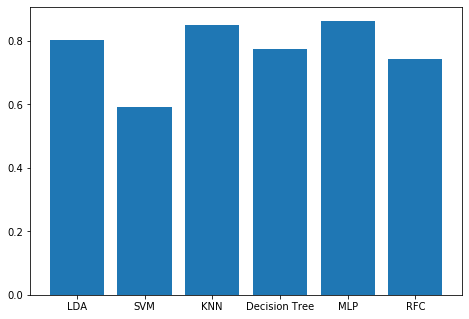

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['LDA', 'SVM', 'KNN', 'Decision Tree', 'MLP', 'RFC'],[accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6])
plt.show()

## C. KÜMELEME

## K-Mean Clustering

Kümeleme yöntemlerinden K-Means modeli seçilerek 6 farklı dil için kümeleme işlemi gerçekleştirilmiştir.

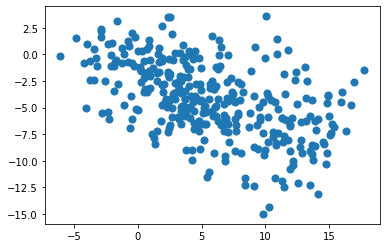

In [99]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
plt.scatter(X[:, 0], X[:, 1], s=50);

In [97]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

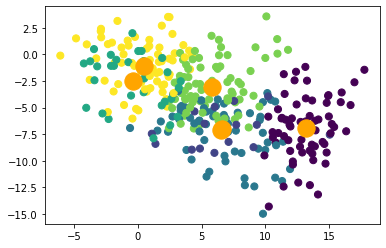

In [98]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='orange', label = 'Centroids')